In [213]:
#import the packages 
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Preprocessing 

In [214]:
#getting the data
df = pd.read_csv('walmart.csv')

In [215]:
#first look to df 
df.head()

,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Rating,Review,Reviewer Name,Review Upvotes,Review Downvotes,Verified Purchaser,Recommended Purchase,Review Date,Five Star,Four Star,Three Star,Two Star,One Star
0,ee40ad5e6211d47a92fa1962938fad16,2020-03-17 03:37:35 +0000,https://www.walmart.com/reviews/product/15066091,walmart.com,"Sylvania 9"" Portable Dvd Player With Swivel Sc...",5.0,This product works great. It's exactly what I ...,Diane,0,0,No,No,12/4/2018,133.0,58.0,15.0,9.0,34.0
1,d10f87c07c206c72b0b5ddbf90541b38,2020-03-27 13:15:01 +0000,https://www.walmart.com/reviews/product/247042233,walmart.com,NaN,1.0,My carrier said this phone had been activated ...,Bren,0,0,No,No,12/21/2018,9.0,0.0,1.0,2.0,8.0
2,ef254e936e02a1b2bdaf89dd51b73403,2020-02-17 04:49:37 +0000,https://www.walmart.com/reviews/product/649827918,walmart.com,"VIZIO 65"" Class 4K UHD Quantum SmartCast Smart...",5.0,The picture on this TV is better than any TV I...,Hieronymesque,0,0,Yes,No,12/25/2019,180.0,39.0,5.0,8.0,13.0
3,183ab6b4ec58daae79c66d0151400b63,2020-02-17 03:11:54 +0000,https://www.walmart.com/reviews/product/665198047,walmart.com,TSV For Fitbit Charge 3 USB Charging Cradle Wa...,5.0,NaN,D,0,0,No,No,4/2/2019,2.0,3.0,0.0,0.0,0.0
4,03628759aaed53a0b9d137bca9991c5d,2020-02-07 01:17:14 +0000,https://www.walmart.com/reviews/product/125301514,walmart.com,AKG K92 Closed-Back Headphones - Stereo - Wire...,5.0,Very well-balanced between the highs and the l...,Dubbsta,52,1,No,No,12/9/2017,9.0,3.0,0.0,0.0,2.0


In [216]:
#to see the number of columns and rows
df.shape

(30006, 18)

### Checking the Missing Values

In [217]:
#to see the missing values 
df.isna().sum()

Uniq Id                    0
Crawl Timestamp            0
Pageurl                    0
Website                    0
Title                   5594
Rating                     0
Review                  4184
Reviewer Name           1633
Review Upvotes             0
Review Downvotes           0
Verified Purchaser         0
Recommended Purchase       0
Review Date                0
Five Star                 96
Four Star                 96
Three Star                96
Two Star                  96
One Star                  96
dtype: int64

In [218]:
#droping null's 
df.dropna( inplace=True)

In [219]:
# to check the missing values again 
df.isna().sum() 

Uniq Id                 0
Crawl Timestamp         0
Pageurl                 0
Website                 0
Title                   0
Rating                  0
Review                  0
Reviewer Name           0
Review Upvotes          0
Review Downvotes        0
Verified Purchaser      0
Recommended Purchase    0
Review Date             0
Five Star               0
Four Star               0
Three Star              0
Two Star                0
One Star                0
dtype: int64

### Checking Duplicated Values 

In [220]:
print("There are {} duplicated values in data frame".format(df.duplicated().sum()))

There are 0 duplicated values in data frame


In [221]:
#to see the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20196 entries, 0 to 30005
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Uniq Id               20196 non-null  object 
 1   Crawl Timestamp       20196 non-null  object 
 2   Pageurl               20196 non-null  object 
 3   Website               20196 non-null  object 
 4   Title                 20196 non-null  object 
 5   Rating                20196 non-null  float64
 6   Review                20196 non-null  object 
 7   Reviewer Name         20196 non-null  object 
 8   Review Upvotes        20196 non-null  int64  
 9   Review Downvotes      20196 non-null  int64  
 10  Verified Purchaser    20196 non-null  object 
 11  Recommended Purchase  20196 non-null  object 
 12  Review Date           20196 non-null  object 
 13  Five Star             20196 non-null  float64
 14  Four Star             20196 non-null  float64
 15  Three Star         

## Perform Exploratory Analysis

In [222]:
df['Rating'].value_counts()

5.0    12297
4.0     3388
1.0     2404
3.0     1211
2.0      896
Name: Rating, dtype: int64

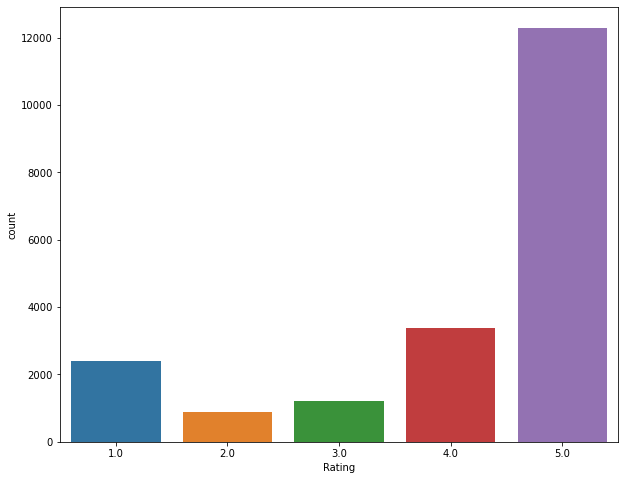

In [223]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Rating', data=df)

Mostly ratings in dataset consist of good reviews such as 4 and 5

In [224]:
df['Rating_Category'] = ['positive' if 4<=Rating<=5 else 'negative' if 1<=Rating<=2 else 'neutral' \
                      for Rating in list(df['Rating'].values)  ]

<AxesSubplot:xlabel='Rating_Category', ylabel='Review Upvotes'>

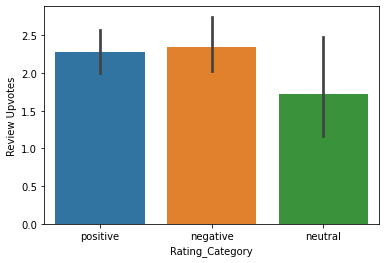

In [225]:
# Create a bar plot for Rating category and Review upvotes
import seaborn as sns
sns.barplot(x='Rating_Category', y='Review Upvotes' , data=df)


<AxesSubplot:xlabel='Rating_Category', ylabel='Review Downvotes'>

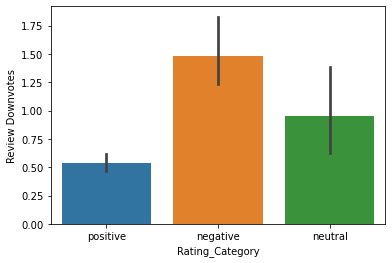

In [226]:
# Create a bar plot for Rating category and Review Downvotes

sns.barplot(x='Rating_Category', y='Review Downvotes' , data=df)

In [227]:
df.head()

,Uniq Id,Crawl Timestamp,Pageurl,Website,Title,Rating,Review,Reviewer Name,Review Upvotes,Review Downvotes,Verified Purchaser,Recommended Purchase,Review Date,Five Star,Four Star,Three Star,Two Star,One Star,Rating_Category
0,ee40ad5e6211d47a92fa1962938fad16,2020-03-17 03:37:35 +0000,https://www.walmart.com/reviews/product/15066091,walmart.com,"Sylvania 9"" Portable Dvd Player With Swivel Sc...",5.0,This product works great. It's exactly what I ...,Diane,0,0,No,No,12/4/2018,133.0,58.0,15.0,9.0,34.0,positive
2,ef254e936e02a1b2bdaf89dd51b73403,2020-02-17 04:49:37 +0000,https://www.walmart.com/reviews/product/649827918,walmart.com,"VIZIO 65"" Class 4K UHD Quantum SmartCast Smart...",5.0,The picture on this TV is better than any TV I...,Hieronymesque,0,0,Yes,No,12/25/2019,180.0,39.0,5.0,8.0,13.0,positive
4,03628759aaed53a0b9d137bca9991c5d,2020-02-07 01:17:14 +0000,https://www.walmart.com/reviews/product/125301514,walmart.com,AKG K92 Closed-Back Headphones - Stereo - Wire...,5.0,Very well-balanced between the highs and the l...,Dubbsta,52,1,No,No,12/9/2017,9.0,3.0,0.0,0.0,2.0,positive
5,7102ff804ecde89329af14dcf21d04b1,2020-03-01 10:26:04 +0000,https://www.walmart.com/reviews/product/149475379,walmart.com,Panasonic HD WiFi Camera KX-HN0002B,1.0,I own 6 of these camera's and every one of the...,Dave in SoCal,5,1,No,No,8/8/2018,1.0,7.0,3.0,2.0,9.0,negative
7,1e6d090571c49a1e5fe7111288f9012b,2020-02-17 03:08:23 +0000,https://www.walmart.com/reviews/product/734398582,walmart.com,Fossil Gen 4 Explorist HR Men's Smartwatch - B...,5.0,Wear daily easy to set up but one has to add a...,Roger,0,0,Yes,No,2/28/2019,39.0,12.0,7.0,3.0,4.0,positive


<AxesSubplot:ylabel='Rating_Category'>

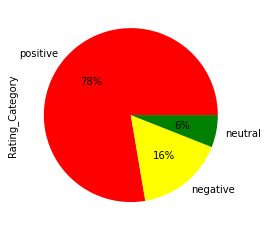

In [228]:
df.Rating_Category.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [229]:
# Create a new dataframe that will only have 2 relevant columns
df = df.filter(['Review','Rating_Category'], axis=1)


In [230]:
# Identify the 2 columns
df.head()

,Review,Rating_Category
0,This product works great. It's exactly what I ...,positive
2,The picture on this TV is better than any TV I...,positive
4,Very well-balanced between the highs and the l...,positive
5,I own 6 of these camera's and every one of the...,negative
7,Wear daily easy to set up but one has to add a...,positive


In [231]:
# For sentiment analysis ,we  only want to see positive and negative sentiments
# Remove the neutral sentiments from the dataframe
df = df[df['Rating_Category'] != 'nuetral']

In [232]:
df['Review'].shape

(20196,)

In [233]:
df['Rating_Category'].shape

(20196,)

In [234]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benjo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [235]:
# assign the values as 1 for positive and 0 for negative
mymap = {'positive': 1, 'negative': 0,'neutral':2}
df=df.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [236]:
df.to_csv('new',index=False)

In [237]:
df=pd.read_csv("new")

In [238]:
df.head()

,Review,Rating_Category
0,This product works great. It's exactly what I ...,1
1,The picture on this TV is better than any TV I...,1
2,Very well-balanced between the highs and the l...,1
3,I own 6 of these camera's and every one of the...,0
4,Wear daily easy to set up but one has to add a...,1


In [239]:
df.shape

(20196, 2)

In [240]:
df['Rating_Category'].value_counts()

1    15685
0     3300
2     1211
Name: Rating_Category, dtype: int64

# Text Processing

In [241]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [242]:
df['Review'][0]
Review = re.sub('[^a-zA-Z]', ' ', df['Review'][0]) 
Review = Review.lower()  
Review = Review.split()  
ps =PorterStemmer()
Review = [ps.stem(word) for word in Review if not  word in set(stopwords.words('english'))] 
Review = ' '.join(Review) 
Review

'product work great exactli look'

In [243]:
corpus = [] 
for i in range (0,20196 ):
    Review = re.sub('[^a-zA-Z]', ' ', df['Review'][i] )
    Review = Review.lower()
    Review = Review.split()
    ps =PorterStemmer()
    Review = [ps.stem(word) for word in Review if not  word in set(stopwords.words('english'))]
    Review = ' '.join(Review)
    corpus.append(Review)

In [244]:
corpus

['product work great exactli look',
 'pictur tv better tv ever own life extrem low latenc hdr wcg make wonder way experi high frame rate video game without input lag whatsoev would',
 'well balanc high low bass trebl good volum ascend abil mean turn volum devic way headphon either get loud lot distort distort occur probabl due qualiti record volum music track given lastli like fact support band headphon headrest band top head actual rest support band comfort go way ear',
 'camera everi one experi issu ghz support meh camera fail stay connect network see pictur camera bounc respons time repli client pc whoever write firmwar realli need test sand public updat okay other total reek havoc make camera work wors wish could downgrad firmwar also reset camera factori default connect anoth ssid wireless network',
 'wear daili easi set one add account reciv respond text',
 'soon got packag mail fianc instal got home work pretti amaz love turn light click button best thing dim light dont want nee

# Feature Extraction

**Creating bags of words model**

In [245]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 2000)
x = cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [246]:
print(cv.get_feature_names())

['abc', 'abil', 'abl', 'absolut', 'ac', 'accept', 'access', 'accessori', 'accid', 'accident', 'accomplish', 'account', 'accur', 'accuraci', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'adapt', 'add', 'addit', 'address', 'adequ', 'adjust', 'admit', 'adult', 'advanc', 'advantag', 'advertis', 'aesthet', 'affect', 'afford', 'afraid', 'age', 'ago', 'agre', 'ahead', 'air', 'airplay', 'airpod', 'alarm', 'alert', 'alexa', 'allow', 'almost', 'alon', 'along', 'alot', 'alreadi', 'alright', 'also', 'alta', 'altern', 'although', 'alway', 'amaz', 'amazingli', 'amazon', 'ambient', 'amount', 'amp', 'analog', 'anc', 'android', 'angl', 'announc', 'annoy', 'anoth', 'answer', 'antenna', 'anybodi', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'anywher', 'apart', 'app', 'appar', 'appear', 'appl', 'appli', 'applic', 'appreci', 'appropri', 'approxim', 'area', 'arm', 'around', 'arriv', 'art', 'asid', 'ask', 'asleep', 'aspect', 'assembl', 'assist', 'assum', 'attach', 'attempt', 'attent', 'attract', '

In [247]:
x.shape

(20196, 2000)

In [248]:
y = df.iloc[:,1].values

In [249]:
y.shape

(20196,)

In [250]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0) 

In [251]:
X_train.shape

(15147, 2000)

In [252]:
X_test.shape

(5049, 2000)

In [253]:
y_train.shape

(15147,)

In [254]:
y_test.shape

(5049,)

**Applying various Machine Learning Classification Models**

**GaussianNB**

In [255]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = gnb.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1g = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test, y_pred,pos_label='positive',average='micro')
score3= recall_score(y_test, y_pred,pos_label='positive',average='micro')
print("\n")
print("Accuracy is ",round(score1g*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data:
  [1 0 1 ... 1 1 1]


Confusion Matrix:
 [[ 176   48  644]
 [ 247  590 3060]
 [  31   31  222]]


Accuracy is  19.57 %
Precision is  0.2
Recall is  0.2


C:\Users\benjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


**KNN Model**

In [256]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(X_train, y_train)


# Predicting the Test set results 
y_pred = clf.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1k = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test, y_pred,pos_label='positive',average='micro')
score3= recall_score(y_test, y_pred,pos_label='positive',average='micro')
print("\n")
print("Accuracy is ",round(score1k*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data:
  [1 0 1 ... 1 1 1]


Confusion Matrix:
 [[ 190  675    3]
 [  45 3849    3]
 [  24  258    2]]


Accuracy is  80.04 %
Precision is  0.8
Recall is  0.8


C:\Users\benjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


**Support Vector Machine SVM Model**

In [257]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = svc.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1s = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test, y_pred,pos_label='positive',average='micro')
score3= recall_score(y_test, y_pred,pos_label='positive',average='micro')
print("\n")
print("Accuracy is ",round(score1s*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data:
  [1 0 1 ... 1 1 1]


Confusion Matrix:
 [[ 565  234   69]
 [ 158 3644   95]
 [  77  166   41]]


Accuracy is  84.18 %
Precision is  0.84
Recall is  0.84


C:\Users\benjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


**Random Forest Model**

In [258]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train, y_train)


# Predicting the Test set results 
y_pred = rfc.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1r = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test, y_pred,pos_label='positive',average='micro')
score3= recall_score(y_test, y_pred,pos_label='positive',average='micro')
print("\n")
print("Accuracy is ",round(score1r*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data:
  [1 0 1 ... 1 1 1]


Confusion Matrix:
 [[ 499  365    4]
 [  90 3806    1]
 [  48  235    1]]


Accuracy is  85.28 %
Precision is  0.85
Recall is  0.85


C:\Users\benjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


**Decision Tree Classification Model**

In [259]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier().fit(X_train, y_train)


# Predicting the Test set results 
y_pred = dtc.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1d = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test, y_pred,pos_label='positive',average='micro')
score3= recall_score(y_test, y_pred,pos_label='positive',average='micro')
print("\n")
print("Accuracy is ",round(score1d*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data:
  [1 0 1 ... 1 1 1]


Confusion Matrix:
 [[ 497  310   61]
 [ 279 3485  133]
 [  71  182   31]]


Accuracy is  79.48 %
Precision is  0.79
Recall is  0.79


C:\Users\benjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


**XGBoost Classifier**

In [260]:
# Fitting classifier to the Training set
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1x = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test, y_pred,pos_label='positive',average='micro')
score3= recall_score(y_test, y_pred,pos_label='positive',average='micro')
print("\n")
print("Accuracy is ",round(score1x*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data:
  [1 0 1 ... 1 1 1]


Confusion Matrix:
 [[ 519  336   13]
 [  79 3804   14]
 [  53  224    7]]


Accuracy is  85.76 %
Precision is  0.86
Recall is  0.86


**TF IDF**

In [261]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
corpus = vectorizer.fit_transform(corpus).toarray()
X =corpus
X.shape

(20196, 2500)

**GaussianNB**

In [262]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB() 
gnb.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = gnb.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1g = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test, y_pred,pos_label='positive',average='micro')
score3= recall_score(y_test, y_pred,pos_label='positive',average='micro')
print("\n")
print("Accuracy is ",round(score1g*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data:
  [1 0 1 ... 1 1 1]


Confusion Matrix:
 [[ 176   48  644]
 [ 247  590 3060]
 [  31   31  222]]


Accuracy is  19.57 %
Precision is  0.2
Recall is  0.2


C:\Users\benjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


**KNNModel**

In [263]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier().fit(X_train, y_train)


# Predicting the Test set results 
y_pred = clf.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1k = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test, y_pred,pos_label='positive',average='micro')
score3= recall_score(y_test, y_pred,pos_label='positive',average='micro')
print("\n")
print("Accuracy is ",round(score1k*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data:
  [1 0 1 ... 1 1 1]


Confusion Matrix:
 [[ 190  675    3]
 [  45 3849    3]
 [  24  258    2]]


Accuracy is  80.04 %
Precision is  0.8
Recall is  0.8


C:\Users\benjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


**SVM Model**

In [264]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)


# Predicting the Test set results 
y_pred = svc.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1s = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test, y_pred,pos_label='positive',average='micro')
score3= recall_score(y_test, y_pred,pos_label='positive',average='micro')
print("\n")
print("Accuracy is ",round(score1s*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data:
  [1 0 1 ... 1 1 1]


Confusion Matrix:
 [[ 565  234   69]
 [ 158 3644   95]
 [  77  166   41]]


Accuracy is  84.18 %
Precision is  0.84
Recall is  0.84


C:\Users\benjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


**Random Forest Model**

In [265]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train, y_train)


# Predicting the Test set results 
y_pred = rfc.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1r = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test, y_pred,pos_label='positive',average='micro')
score3= recall_score(y_test, y_pred,pos_label='positive',average='micro')
print("\n")
print("Accuracy is ",round(score1r*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data:
  [1 0 1 ... 1 1 1]


Confusion Matrix:
 [[ 494  371    3]
 [  88 3807    2]
 [  46  235    3]]


Accuracy is  85.24 %
Precision is  0.85
Recall is  0.85


C:\Users\benjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


**Decision Tree Classification Model**

In [266]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier().fit(X_train, y_train)


# Predicting the Test set results 
y_pred = dtc.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1d = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test, y_pred,pos_label='positive',average='micro')
score3= recall_score(y_test, y_pred,pos_label='positive',average='micro')
print("\n")
print("Accuracy is ",round(score1d*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data:
  [1 0 1 ... 1 1 1]


Confusion Matrix:
 [[ 498  301   69]
 [ 276 3484  137]
 [  76  183   25]]


Accuracy is  79.36 %
Precision is  0.79
Recall is  0.79


C:\Users\benjo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


**XGBoost Classifier**

In [267]:
# Fitting classifier to the Training set
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = model.predict(X_test)
print("The actual testing data:\n ",y_test)


# Make the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\n")
print ("Confusion Matrix:\n",cm)

# Evaluate the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1x = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test, y_pred,pos_label='positive',average='micro')
score3= recall_score(y_test, y_pred,pos_label='positive',average='micro')
print("\n")
print("Accuracy is ",round(score1x*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))


The actual testing data:
  [1 0 1 ... 1 1 1]


Confusion Matrix:
 [[ 519  336   13]
 [  79 3804   14]
 [  53  224    7]]


Accuracy is  85.76 %
Precision is  0.86
Recall is  0.86


**AUC ROC For XGBoost Classifier**

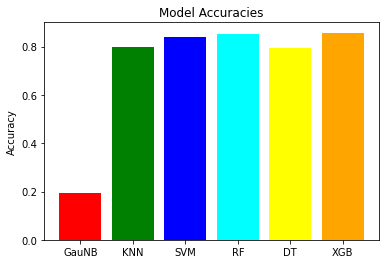

In [269]:
x='GauNB'
y='KNN'
j='SVM'
k='RF'
l='DT'
m='XGB'

c=[x,y,j,k,l,m] 
d=[score1g,score1k,score1s,score1r,score1d,score1x] 
plt.bar(c,d,color=['red', 'green', 'blue', 'cyan','yellow','orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()

## Accuracy of the Models

| Model | Bag of words(%) | TF IDF(%) |
|-------|--------------|--------|
    |GaussianNB| 19.57 | 19.57|
|RandomForest|85.28|85.24|
|KNN|80.04|80.04|
|DecisionTree|79.48|79.36|
|SVM|84.18|84.18|
|XGBoost|85.76|85.76|

From the performance table, I can say that RandomForest and XGBoost Classifier models work better in both the approaches 
as compared to the other models.But, XGBoost is slightly better method compared to RandomForest.This means the XGBoost model
built for the prediction of sentiment of the walmart product review gives 85.76% right prediction in both Bag of words approach
and TF IDF approach. Interestingly, all the models give almost the same accuracy in both the two approaches of NLP